# Import the library

In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt

# load data

In [2]:
print(os.listdir('/kaggle/input/house-prices-advanced-regression-techniques/'))

df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train (1).csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test (1).csv')
df_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
print(f'Train:{df_train.shape}   Test:{df_test.shape}   submission:{df_submission.shape}' )

['sample_submission.csv', 'data_description.txt', 'train (1).csv', 'test (1).csv']
Train:(1460, 81)   Test:(1459, 80)   submission:(1459, 2)


missing_values = train_df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)printing out the first 5 entries

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [6]:
y_train = np.log1p(df_train['SalePrice']) #log1p = log(1+x)
y_test = np.log1p(df_submission['SalePrice'])

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#merge date frames to get rid of unnecessary ones and digitise functions correctly at the same time 
data = pd.concat([df_train.drop('SalePrice', axis=1), df_test])

# missing value

In [9]:
print(data.isna().sum().sort_values(ascending=False).head(10))

PoolQC         2909
MiscFeature    2814
Alley          2721
Fence          2348
MasVnrType     1766
FireplaceQu    1420
LotFrontage     486
GarageQual      159
GarageCond      159
GarageYrBlt     159
dtype: int64


In [10]:
# drop missing values
data = data.drop(['PoolQC','MiscFeature','Alley','Fence', 'MasVnrType', 'FireplaceQu' ], axis=1)


In [11]:
print(data.shape)

(2919, 74)


In [12]:
#  rare missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

LotFrontage     486
GarageYrBlt     159
GarageCond      159
GarageQual      159
GarageFinish    159
GarageType      157
BsmtCond         82
BsmtExposure     82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
MasVnrArea       23
MSZoning          4
Functional        2
Utilities         2
BsmtFullBath      2
BsmtHalfBath      2
GarageArea        1
GarageCars        1
TotalBsmtSF       1
KitchenQual       1
Electrical        1
BsmtUnfSF         1
BsmtFinSF2        1
BsmtFinSF1        1
Exterior2nd       1
Exterior1st       1
SaleType          1
dtype: int64

In [13]:
columns_with_na = missing_values[missing_values > 0].index.tolist()
#Filter only numeric columns among them
numeric_na_cols = [
    col for col in columns_with_na
    if pd.api.types.is_numeric_dtype(data[col])
]
data[numeric_na_cols].describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
count,2433.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2917.000000,2917.000000,2760.000000,2918.000000,2918.000000
mean,69.305795,102.201312,441.423235,49.582248,560.772104,1051.777587,0.429894,0.061364,1978.113406,1.766621,472.874572
std,23.344905,179.334253,455.610826,169.205611,439.543659,440.766258,0.524736,0.245687,25.574285,0.761624,215.394815
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000
25%,59.000000,0.000000,0.000000,0.000000,220.000000,793.000000,0.000000,0.000000,1960.000000,1.000000,320.000000
50%,68.000000,0.000000,368.500000,0.000000,467.000000,989.500000,0.000000,0.000000,1979.000000,2.000000,480.000000
75%,80.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1.000000,0.000000,2002.000000,2.000000,576.000000
max,313.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000


In [14]:
#  replace missing values
data[numeric_na_cols] = data[numeric_na_cols].fillna(data[numeric_na_cols].median())

In [15]:
# Select only non-numeric columns
non_numeric_na_cols = [
    col for col in columns_with_na
    if not pd.api.types.is_numeric_dtype(data[col])
]
data[non_numeric_na_cols].describe()

,MSZoning,Utilities,Exterior1st,Exterior2nd,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,SaleType
count,2915,2917,2918,2918,2838,2837,2837,2840,2839,2918,2918,2917,2762,2760,2760,2760,2918
unique,5,2,15,16,4,4,4,6,6,5,4,7,6,3,5,5,9
top,RL,AllPub,VinylSd,VinylSd,TA,TA,No,Unf,Unf,SBrkr,TA,Typ,Attchd,Unf,TA,TA,WD
freq,2265,2916,1025,1014,1283,2606,1904,851,2493,2671,1492,2717,1723,1230,2604,2654,2525


In [16]:
#  replace missing values
data[non_numeric_na_cols] = data[non_numeric_na_cols].apply(lambda col: col.fillna(col.mode()[0]))

Ensure that all NaNs are replaced

In [17]:
print(data.isna().sum().sort_values(ascending=False))  # Total number of NaN in the entire DataFram 


Id               0
GarageType       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
                ..
MasVnrArea       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SaleCondition    0
Length: 74, dtype: int64


 # non-numeric columns

In [18]:
data_not_numeric = data.select_dtypes(exclude=['number']) # non-numeric columns

In [19]:
data_not_numeric.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [20]:
data_not_numeric.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,...,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,2269,2907,1859,2622,2918,2133,2778,443,2511,2889,...,2672,1493,2719,1880,1389,2763,2813,2641,2526,2402


In [21]:
data_not_numeric.nunique().sort_values()

Street            2
Utilities         2
CentralAir        2
GarageFinish      3
LandSlope         3
PavedDrive        3
LotShape          4
LandContour       4
BsmtCond          4
BsmtQual          4
BsmtExposure      4
ExterQual         4
KitchenQual       4
HeatingQC         5
ExterCond         5
MSZoning          5
BldgType          5
GarageQual        5
GarageCond        5
LotConfig         5
Electrical        5
GarageType        6
Heating           6
Foundation        6
BsmtFinType1      6
RoofStyle         6
BsmtFinType2      6
SaleCondition     6
Functional        7
RoofMatl          8
HouseStyle        8
Condition2        8
SaleType          9
Condition1        9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64

Exterior1st 15, Exterior2nd 16, Neighborhood 25 have too many unique values. You need to figure out if they need to be encoded. 

There are many also non-numeric columns , let's try to determine whether all of them are really important in the training data

In [22]:
temp = data.iloc[:df_train.shape[0],:].copy()
temp['SalePrice']  = df_train['SalePrice']
temp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [23]:
def plot_grouped_bar(df, group_col, value_col, aggfunc='mean', palette='viridis', top_n=None, figsize=(10, 6)):
    """
    Visualizes an aggregated numeric column grouped by a categorical column.

    Parameters:
        df (DataFrame): your input dataset
        group_col (str): the column to group by (e.g., 'Neighborhood')
        value_col (str): the numeric column to aggregate (e.g., 'SalePrice')
        aggfunc (str or callable): aggregation function — e.g. 'mean', 'median', or a custom function
        palette (str): color palette for the bars (any seaborn palette name)
        top_n (int): optionally, show only the top N groups
        figsize (tuple): size of the plot (width, height)
    """
    # Compute the aggregated values by group
    grouped = df.groupby(group_col)[value_col].agg(aggfunc).sort_values(ascending=False)
    
    # Optionally keep only the top N groups
    if top_n:
        grouped = grouped.head(top_n)

    # Set up the plot
    plt.figure(figsize=figsize)
    sns.barplot(x=grouped.values, y=grouped.index, palette=palette)

    # Add titles and labels
    plt.title(f"{aggfunc.title()} {value_col} by {group_col}")
    plt.xlabel(aggfunc.title())
    plt.ylabel(group_col)
    plt.tight_layout()
    plt.show()

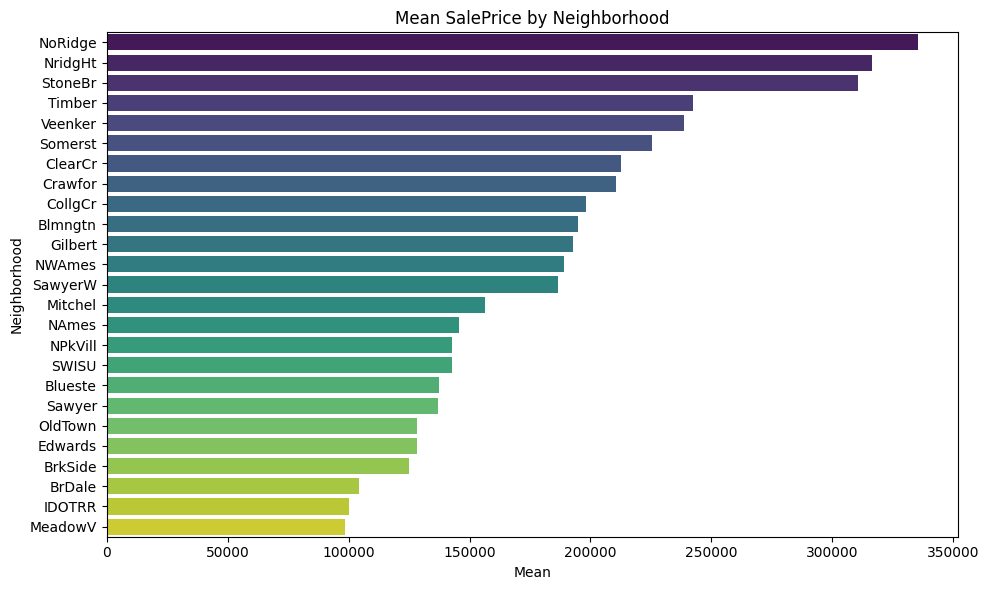

In [24]:
plot_grouped_bar(temp,"Neighborhood", 'SalePrice')

we will replace the names of the districts with the elite rating (average price)

In [25]:
neigh_prices = temp.groupby("Neighborhood")['SalePrice'].mean()
data["NeighborhoodValue"] = data["Neighborhood"].map(neigh_prices)

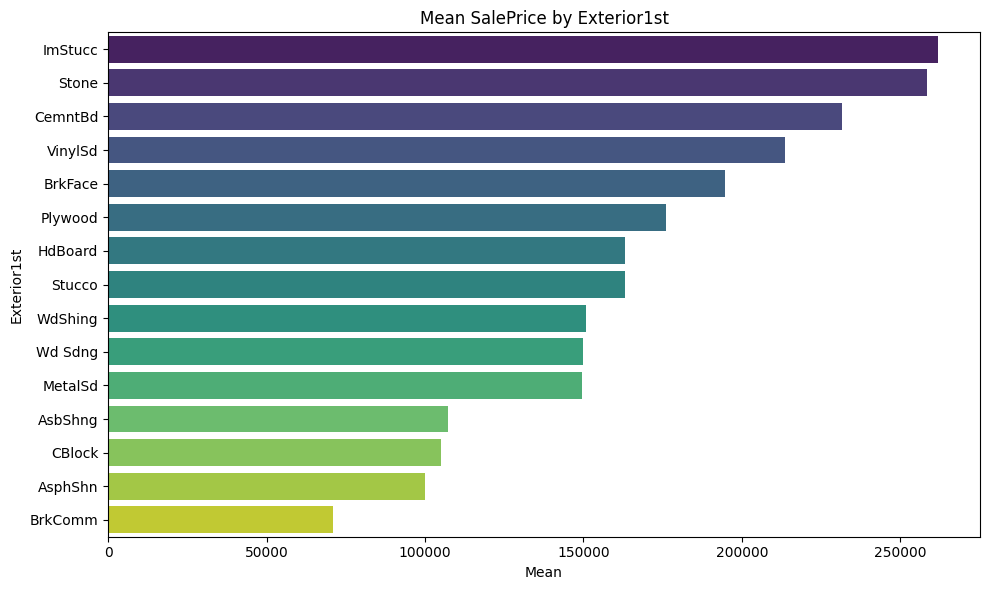

In [26]:
plot_grouped_bar(temp,"Exterior1st", 'SalePrice')

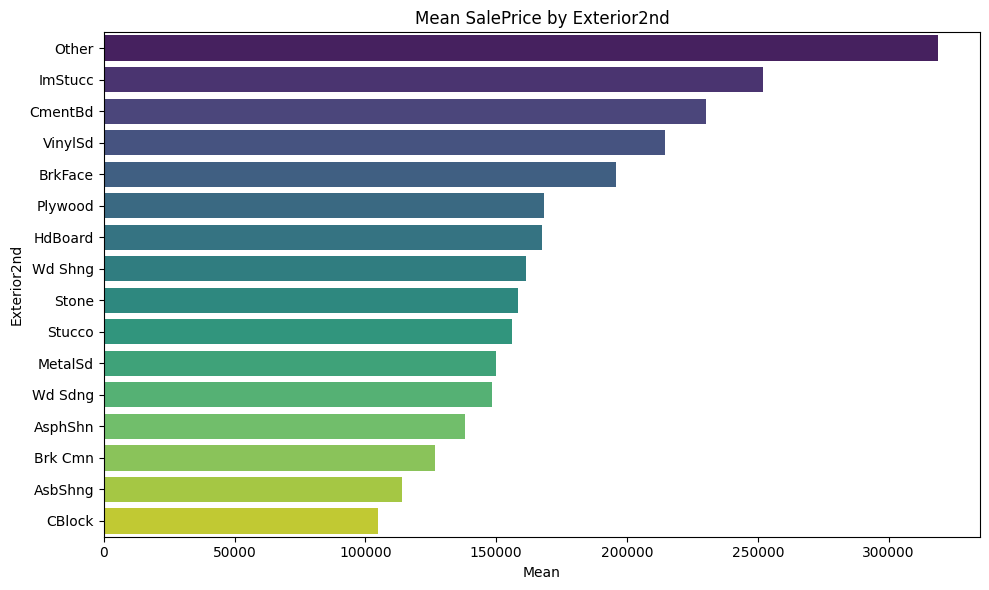

In [27]:
plot_grouped_bar(temp,"Exterior2nd", 'SalePrice')


at first glance, all the features are important, so let's try not to change or code them 

In [28]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def train_lgb_model(X_train, y_train, X_val, y_val, test_ids=None, log_target=False, return_submission=False):
    """
    Trains LGBM on given train/val datasets. Validation optional.

    Parameters:
        X_train, y_train: training set
        X_val, y_val: validation set (optional)
        test_data: test set for predictions (optional)
        test_ids: IDs for submission file (optional)
        log_target: whether to apply expm1 to predictions
        return_submission: whether to return submission DataFrame

    Returns:
        model, rmse (if validation provided), submission (optional)
    """
     
    # Ініціалізація
    model = lgb.LGBMRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
      )

    # Навчання 
    model.fit( X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='rmse')

    # RMSE на валідації
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f"Validation RMSE: {rmse:.4f}")
    
    if test_ids is not None and return_submission:
        test_preds = model.predict(X_val)
        print('isnan',np.isnan(test_preds).sum() )    # Кількість NaN
        print('isinf', np.isinf(test_preds).sum() )    # Кількість -inf або inf
        if log_target:
            test_preds = np.expm1(test_preds)
        submission = pd.DataFrame({'Id': test_ids, 'SalePrice': test_preds})
        return model, rmse, submission
    
    
    return model, rmse

In [29]:
data[data_not_numeric.columns] = data[data_not_numeric.columns].astype('category')
#switching to the type 'category'  will allow you to save the entire space of unique values after dividing into training and test sets

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Id                 2919 non-null   int64   
 1   MSSubClass         2919 non-null   int64   
 2   MSZoning           2919 non-null   category
 3   LotFrontage        2919 non-null   float64 
 4   LotArea            2919 non-null   int64   
 5   Street             2919 non-null   category
 6   LotShape           2919 non-null   category
 7   LandContour        2919 non-null   category
 8   Utilities          2919 non-null   category
 9   LotConfig          2919 non-null   category
 10  LandSlope          2919 non-null   category
 11  Neighborhood       2919 non-null   category
 12  Condition1         2919 non-null   category
 13  Condition2         2919 non-null   category
 14  BldgType           2919 non-null   category
 15  HouseStyle         2919 non-null   category
 16  OverallQual

In [31]:
X_train = data.iloc[:df_train.shape[0], 1:]
X_test = data.iloc[df_train.shape[0]:, 1:]
display(X_train.head())
display(X_test.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,NeighborhoodValue
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,197965.773333
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,238772.727273
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,197965.773333
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,210624.725490
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,335295.317073


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,NeighborhoodValue
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,145847.080000
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,145847.080000
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,192854.506329
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,192854.506329
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,144,0,0,1,2010,WD,Normal,310499.000000


In [32]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,NeighborhoodValue
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.686301,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.037950,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,58678.654296
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,98576.470588
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,136793.135135
50%,50.000000,68.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,186555.796610
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,197965.773333
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,335295.317073


# model LGBMRegressor

In [33]:
 # Розділення на train / validation
X, X_val, y, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model, score = train_lgb_model (X, y, X_val, y_val, test_ids=df_test['Id'],  log_target=True)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3146
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 71
[LightGBM] [Info] Start training from score 12.030658
Validation RMSE: 0.1331


In [34]:
model, score, submission = train_lgb_model (X_train, y_train, X_test, y_test, test_ids=df_test['Id'],  log_target=True, return_submission=True)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3401
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 71
[LightGBM] [Info] Start training from score 12.024057
Validation RMSE: 0.3908
isnan 0
isinf 0


# feature importance check

In [35]:
def plot_feature_importance(model, X, top_n=30):
    """
    Побудова графіку важливості ознак
    
    Parameters:
    - model: натренована модель LightGBM
    - X: датафрейм із ознаками
    - top_n: скільки найважливіших показати
    """
    importance = model.feature_importances_
    feature_names = X.columns

    fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    fi_df = fi_df.sort_values(by='Importance', ascending=False).head(top_n)

    plt.figure(figsize=(10, 8))
    sns.barplot(data=fi_df, x='Importance', y='Feature', palette='viridis')
    plt.title('Топ важливих ознак (LightGBM)')
    plt.tight_layout()
    plt.show()



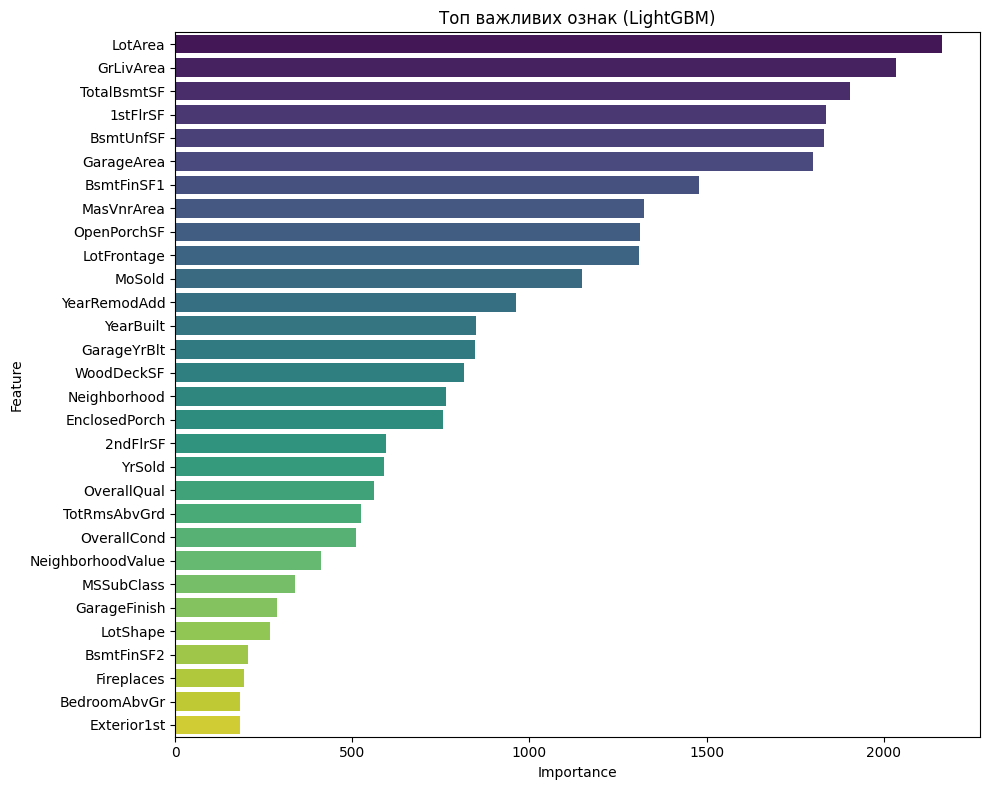

In [36]:
plot_feature_importance(model, X_train)

# price distribution

In [37]:
#let's look at the price distribution
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


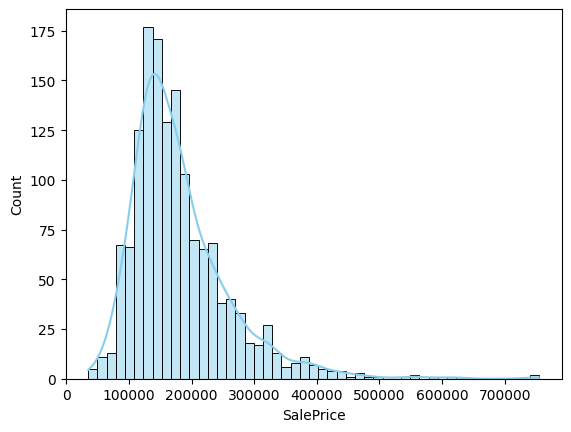

In [38]:
sns.histplot(df_train['SalePrice'], kde=True, color='skyblue');

# Correlation matrix
works with numerical data only

In [39]:
df_numeric = df_train.select_dtypes(include='number')

corr_matrix = df_numeric.corr()  # Correlation matrix

In [40]:
#saleprice correlation matrix
k = 12 #number of variables for heatmap
cols = corr_matrix.abs().nlargest(k, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt'],
      dtype='object')

<Axes: >

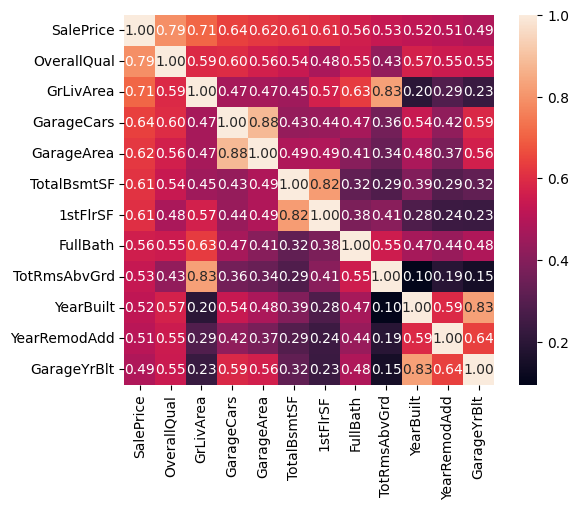

In [41]:
df_train[cols].corr()
sns.heatmap(df_train[cols].corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

In [42]:
high_corr = corr_matrix[(corr_matrix.abs() > 0.8) & (corr_matrix.abs() < 1.0)]  # Filtering correlations > 0.9
display(high_corr.dropna(how='all').dropna(axis=1, how='all')) #To reduce the size, we need to remove rows and columns containing only NaN

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea
YearBuilt,NaN,NaN,NaN,NaN,NaN,0.825667,NaN,NaN
TotalBsmtSF,NaN,NaN,0.81953,NaN,NaN,NaN,NaN,NaN
1stFlrSF,NaN,0.81953,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,NaN,NaN,NaN,NaN,0.825489,NaN,NaN,NaN
TotRmsAbvGrd,NaN,NaN,NaN,0.825489,NaN,NaN,NaN,NaN
GarageYrBlt,0.825667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageCars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.882475
GarageArea,NaN,NaN,NaN,NaN,NaN,NaN,0.882475,NaN


<Axes: title={'center': 'GarageCars and GarageArea dependencya'}, xlabel='GarageCars', ylabel='GarageArea'>

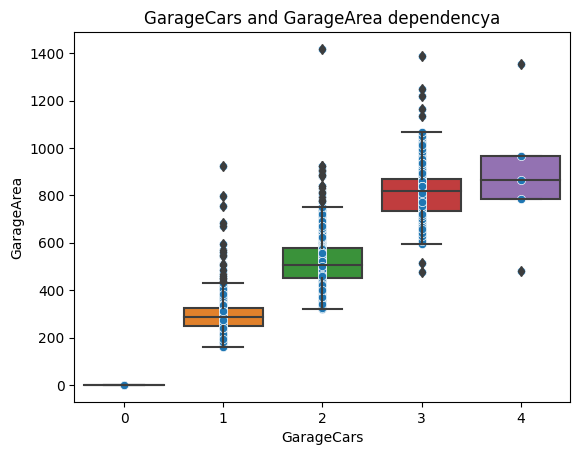

In [43]:
sns.scatterplot(x=df_train["GarageCars"], y=df_train["GarageArea"])
plt.xlabel("number of cars in the garage")
plt.ylabel("Garage Area")
plt.title("GarageCars and GarageArea dependencya")
sns.boxplot(x=df_train["GarageCars"], y=df_train["GarageArea"])